In [12]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
load_dotenv()

True

In [13]:
portfolio = pd.DataFrame()
tickers = ['MSFT', 'AAPL']

In [14]:
portfolio['Ticker'] = ['MSFT', 'AAPL']
portfolio['Shares'] = [200, 320]
portfolio.head()

,Ticker,Shares
0,MSFT,200
1,AAPL,320


In [15]:
portfolio.index = portfolio['Ticker']

In [16]:
portfolio.head()

,Ticker,Shares
Ticker,,
MSFT,MSFT,200
AAPL,AAPL,320


In [17]:
portfolio.drop(columns=['Ticker'], inplace=True)
portfolio

,Shares
Ticker,
MSFT,200
AAPL,320


In [19]:
alpaca = tradeapi.REST(
    os.getenv('ALPACA_API_KEY'),
    os.getenv('ALPACA_SECRET_KEY'),
    api_version="v2")

In [25]:
today = pd.Timestamp("2021-09-20", tz="America/New_York").isoformat()
timeframe='1D'

prices = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
prices.index = prices.index.date

In [26]:
prices.head()

AAPL                                       MSFT                  \
              open    high     low   close     volume    open    high     low   
2021-09-20  143.86  144.84  141.27  142.97  104053339  296.33  298.72  289.52   

                              
             close    volume  
2021-09-20  294.26  30460159

In [27]:
values = []
def current_value(ticker):
    value = float(prices[ticker]['close'])*float(portfolio.loc[ticker]['Shares'])
    values.append(value)
    print(f'The value of the {ticker} stonk is:    ${value}')

In [28]:
current_value('AAPL')

The value of the AAPL stonk is:    $45750.4


In [29]:
current_value('MSFT')

The value of the MSFT stonk is:    $58852.0


In [30]:
portfolio['Value'] = values

<AxesSubplot:title={'center':'Value of Stonk Holdings'}, ylabel='Value'>

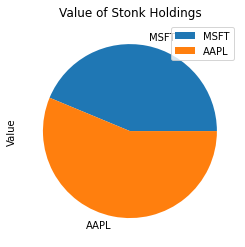

In [34]:
portfolio_values.plot.pie(y='Value', title='Value of Stonk Holdings')

<AxesSubplot:title={'center':'Value of Stonk Holdings'}, xlabel='Ticker'>

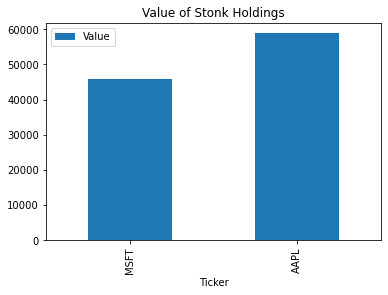

In [35]:
portfolio_values.plot.bar(y='Value', title='Value of Stonk Holdings')